In [1]:
#Cell 1 - Imports & Setup

import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set(style="whitegrid")
warnings.filterwarnings('ignore')

# If needed, append the project root to sys.path
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

# Define directories
figures_dir = "../reports/figures"
text_dir = "../reports/text"
processed_dir = "../data/processed"

os.makedirs(figures_dir, exist_ok=True)
os.makedirs(text_dir, exist_ok=True)
os.makedirs(processed_dir, exist_ok=True)

# Import our feature engineering module
from src.feature_engineering import engineer_features, encode_categorical


In [ ]:
#Cell 2 - Load Cleaned Data

cleaned_data_path = os.path.join(processed_dir, "train_cleaned.csv")
df = pd.read_csv(cleaned_data_path)
print("Cleaned data loaded. Shape:", df.shape)

Cleaned data loaded. Shape: (1399, 81)


In [3]:
#Cell 3 - Apply Feature Engineering

df_fe = engineer_features(df)
print("Feature engineering applied. New columns:", 
      set(df_fe.columns) - set(df.columns))


Feature engineering applied. New columns: set()


In [ ]:
#Cell 4 - Check Newly Created Features

new_feats = ['HouseAge', 'YearsSinceRemodel', 'TotalSF', 'LogGrLivArea', 'HasGarage']
display(df_fe[new_feats].head(10))

# Save a summary to text
feats_summary_path = os.path.join(text_dir, "engineered_features_summary.csv")
df_fe[new_feats].describe().to_csv(feats_summary_path)


,HouseAge,YearsSinceRemodel,TotalSF,LogGrLivArea,HasGarage
0,5,5,2566,7.444833,1
1,31,31,2524,7.141245,1
2,7,6,2706,7.488294,1
3,91,36,2473,7.448916,1
4,8,8,3343,7.695758,1
5,16,14,2158,7.217443,1
6,3,2,3380,7.435438,1
7,36,36,3197,7.645398,1
8,77,58,2726,7.481556,1
9,69,58,2068,6.982863,1


In [5]:
#Cell 5 - Optional Categorical Encoding
# Example: encode MSZoning & Neighborhood

df_encoded = encode_categorical(df_fe, cat_cols=['MSZoning', 'Neighborhood'])
print("Data shape after one-hot encoding:", df_encoded.shape)

# Save sample of encoded data
encoded_sample_path = os.path.join(text_dir, "encoded_sample.csv")
df_encoded.head(10).to_csv(encoded_sample_path, index=False)


Data shape after one-hot encoding: (1399, 112)


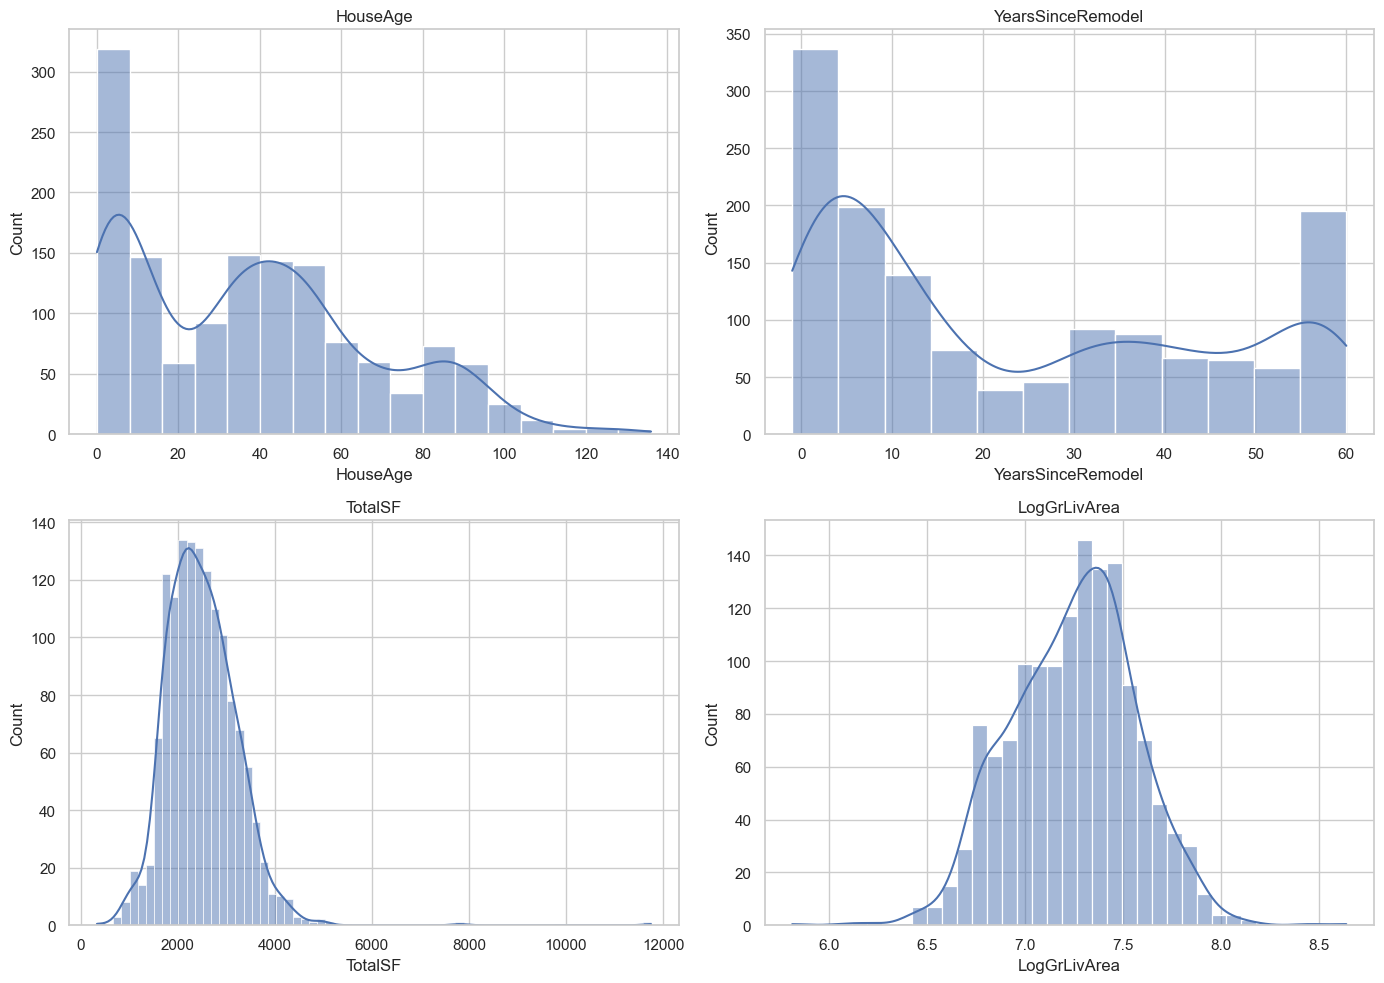

In [ ]:
#Cell 6 - Visualize Distributions of New Features

plot_cols = ['HouseAge', 'YearsSinceRemodel', 'TotalSF', 'LogGrLivArea']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(plot_cols):
    sns.histplot(df_fe[col], ax=axes[i], kde=True)
    axes[i].set_title(col)

plt.tight_layout()
feat_fig_path = os.path.join(figures_dir, "new_features_distribution.png")
plt.savefig(feat_fig_path, dpi=300, bbox_inches='tight')
plt.show()

In [7]:
#Cell 7 - Save Feature-Engineered Data

feature_data_path = os.path.join(processed_dir, "train_feature_engineered.csv")
df_fe.to_csv(feature_data_path, index=False)
print("Feature-engineered data saved to:", feature_data_path)

encoded_data_path = os.path.join(processed_dir, "train_feature_engineered_encoded.csv")
df_encoded.to_csv(encoded_data_path, index=False)
print("Encoded data saved to:", encoded_data_path)


Feature-engineered data saved to: ../data/processed/train_feature_engineered.csv
Encoded data saved to: ../data/processed/train_feature_engineered_encoded.csv
